Looking at data from runs on Feb 5
- ST09 dataset: visual network, 10 nodes
- 3 runs using random initial conditions
- 3 runs using same intitial conditions

Trying to see how we can get one solution instead of multiple (for conduc velocity)

In [2]:
import sys
import glob
import numpy as np
import seaborn as sns


OUTPUT_PATH = '/scratch/l/lfefebvr/noorir/model/Output/'

Extra Helper Functions

In [3]:
def plot_ts(nodes, all_ts):


    plt.figure(2, figsize=(40, 6))
    for sing_node in range(nodes):
        plt.plot(np.array(all_ts)[sing_node])

    plt.show()

Choosing which jobs to analyze

In [4]:
# CHANGE THIS CELL ACCORDING TO DATA YOU ARE ANALYZING

NTASKS =40
JOB = ['921326', '924046', '921329','921330','921331','921332']
NUM_JOBS = len(JOB)

Loading all the data we need for analysis

In [5]:
# Loading variable file names we will use for analysis into a dictionary

load_files = {} #names of all the load_vars_ts_delays files

for job in JOB:
    var = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"load_vars_ts_delay*")
    if len(var) ==1:
        load_files[job] = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"load_vars_ts_delay*")[0]
        
        
if len(load_files.keys()) == len(JOB):
    print("Loaded vars files successfully", len(JOB))
load_files

Loaded vars files successfully 6


{'921326': '/scratch/l/lfefebvr/noorir/model/Output/2019-02-05/921326/load_vars_ts_delay038.py',
 '921329': '/scratch/l/lfefebvr/noorir/model/Output/2019-02-05/921329/load_vars_ts_delay040.py',
 '921330': '/scratch/l/lfefebvr/noorir/model/Output/2019-02-05/921330/load_vars_ts_delay041.py',
 '921331': '/scratch/l/lfefebvr/noorir/model/Output/2019-02-05/921331/load_vars_ts_delay042.py',
 '921332': '/scratch/l/lfefebvr/noorir/model/Output/2019-02-05/921332/load_vars_ts_delay043.py',
 '924046': '/scratch/l/lfefebvr/noorir/model/Output/2019-02-06/924046/load_vars_ts_delay039.py'}

In [6]:
# Retreive the best solution - all_res is dict with arrays with the conduction 
# velocities vector that had the lowest MSE at the end of the diff evol algorithm

all_res = {} #dictionary of all the solution arrays
i=0
for job in JOB:
    full_list = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"rank*") #list of all results for a single job
    if len(full_list) == NTASKS:
        low = 1
        for res in full_list:
            start = res.index("_")+1
            end = res.index(".npy")
            if float(res[start:end])< low:
                low = float(res[start:end])
        print(i," Job: "+job+", lowest MSE: ", low)
        i = i+ 1
        final_res = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"rank*"+str(low)+"*")[0]
        all_res[job]= np.load(final_res)
    else:
        print("Error", job)
        break

0  Job: 921326, lowest MSE:  0.03817554480491078
1  Job: 924046, lowest MSE:  0.035886106325833486
2  Job: 921329, lowest MSE:  0.053012720394832354
3  Job: 921330, lowest MSE:  0.07953705369894944
4  Job: 921331, lowest MSE:  0.08806108763055853
5  Job: 921332, lowest MSE:  0.0913309274749201


# STARTING ANALYSIS

Plotting all histograms of all the delay estimates

1 JOB #:  921326 min: 664.2197589493253 max: 9597.22552098897 avg: 4805.632169992467
2 JOB #:  924046 min: 507.5348551139241 max: 9897.647043147546 avg: 4578.443724483918
3 JOB #:  921329 min: 511.41094806064666 max: 9952.724969751587 avg: 4115.048968720969
4 JOB #:  921330 min: 500.6252381344457 max: 9605.693716388738 avg: 3840.2656679767747
5 JOB #:  921331 min: 501.5004094522028 max: 8860.381146259273 avg: 4035.41593595395
6 JOB #:  921332 min: 532.0031847405417 max: 9943.094932739637 avg: 4172.264475236312


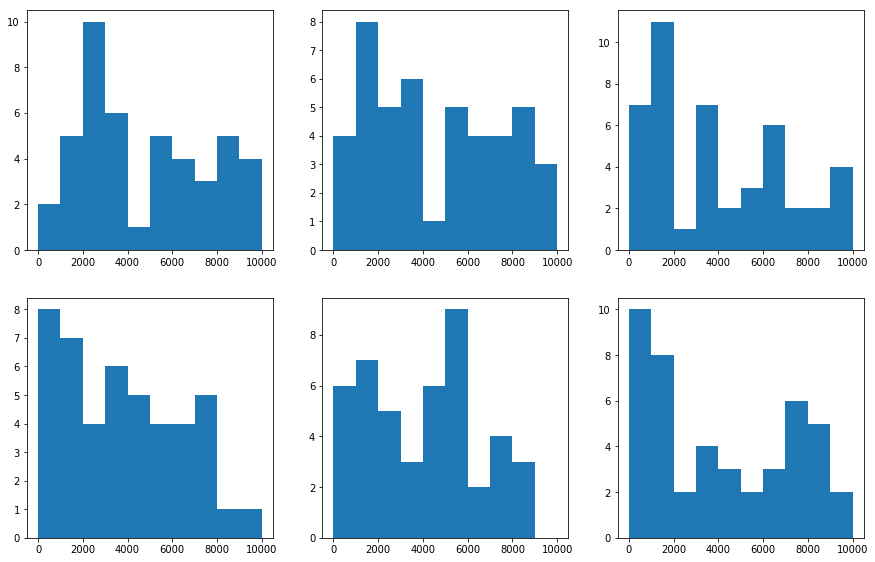

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15.0,15.0))
for i in range(NUM_JOBS): 
    plt.subplot(3, 3, i+1)


    print(i+1, "JOB #: ", JOB[i], "min: {} max: {} avg: {}".format(np.min(all_res[JOB[i]]), 
                                                                   np.max(all_res[JOB[i]]), np.average(all_res[JOB[i]])))
    plt.hist(all_res[JOB[i]], range= (0,10000))
    #row major counting
    

In [19]:
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots

Looking at correlation matrices and delay matrices

/gpfs/fs0/scratch/l/lfefebvr/noorir/model/helper_functions.py:11: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/site-packages/traitlets/config/application.py", line 658, i

not constant
not constant
not constant
constant
constant
constant


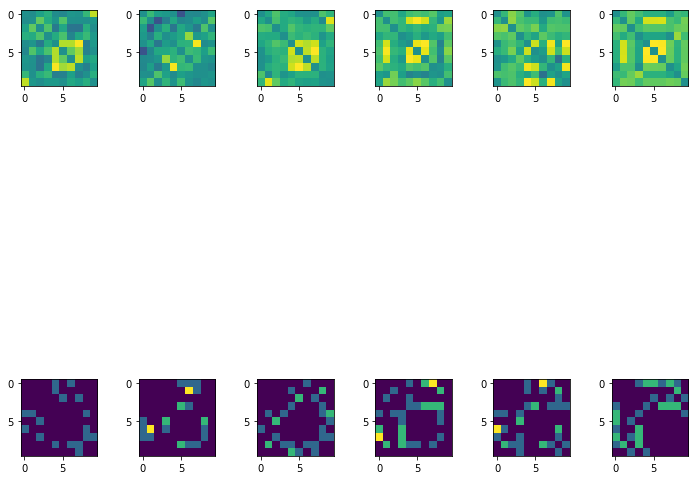

In [8]:
# ALL THE RESULTS AT ONCE

# estimated correlation plot on top
# estimated delay matrix on the bottom

rows = 2
cols = NUM_JOBS
i = 0
f, ax = plt.subplots(rows,cols, figsize=(10, 10))
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=hspace)

#for r in range(rows):
for c in range(cols):
    exec(open(load_files[JOB[i]]).read()) #loading variables into the environment
    ind = 0
    cmat = np.ones((nodes, nodes))
    for row in range(0,nodes):
        for col in range(row+1, nodes):
            cmat[row,col] = all_res[JOB[i]][ind]
            cmat[col,row] = all_res[JOB[i]][ind]
            ind += 1
    cmat = np.reciprocal(cmat, where = cmat>0)
    ue_array, _, delays = hf.wcm.wc_modelsim_c(wc_params, tract_mat, cmat, nodes,
                                   seed_num = wc_seed)

    exp_data = hf.plot_cor_mat(ue_array, nodes, skip)

    np.fill_diagonal(exp_data, 0)
#     sns.heatmap(exp_data, vmax = 1, vmin = -1,  ax = ax[0,c])
#     ax[0,c].set_title("JOB #: {}".format(JOB[i]))
#     ax[0,c].aspect='auto'
    
#     sns.heatmap(delays, vmax =3, ax = ax[1,c])
#     ax[1,c].aspect='auto'
    
    cax = ax[0,c].imshow(exp_data, aspect='equal', vmax = 1, vmin = -1)
    cax = ax[1,c].imshow(delays, aspect='equal', vmax = 3)

    i = i+1


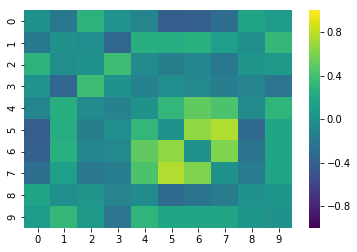

In [9]:
sns.heatmap(targ_data, vmax = 1, vmin = -1, cmap = "viridis")

1
not constant
10


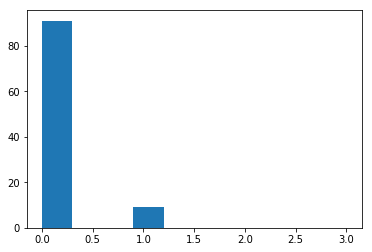

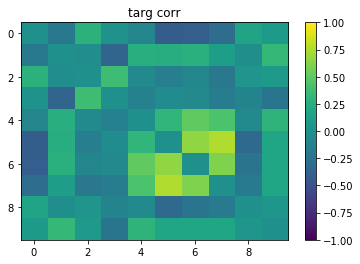

10


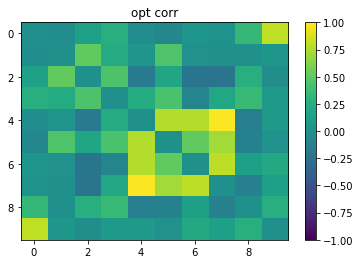

MSE 0.038175544805  JOB: JOB[i]
10


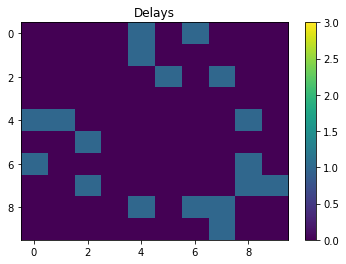

10


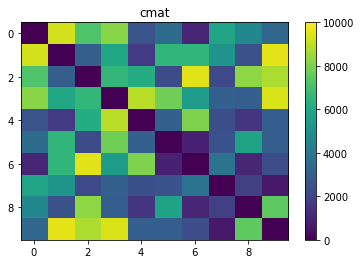

3
not constant
10


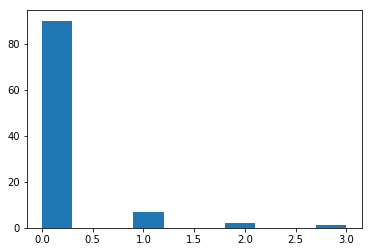

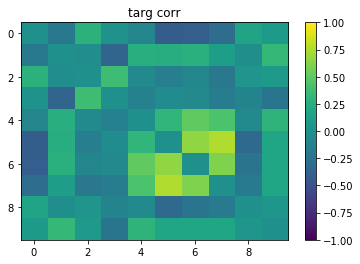

10


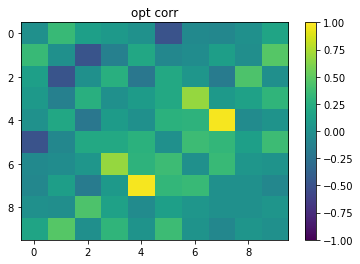

MSE 0.0358861063258  JOB: JOB[i]
10


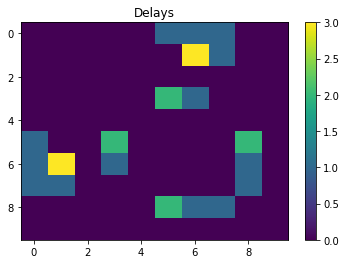

10


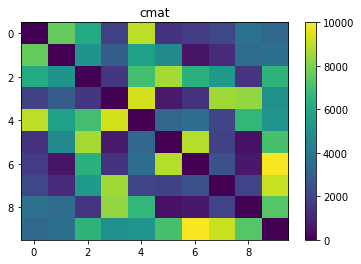

2
not constant
10


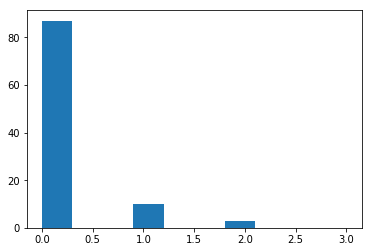

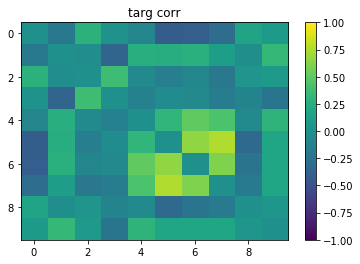

10


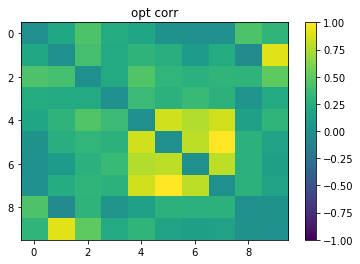

MSE 0.0530127203946  JOB: JOB[i]
10


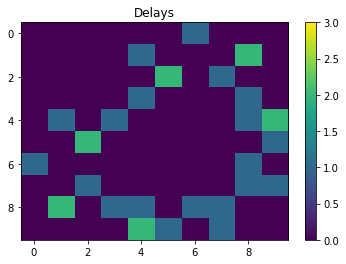

10


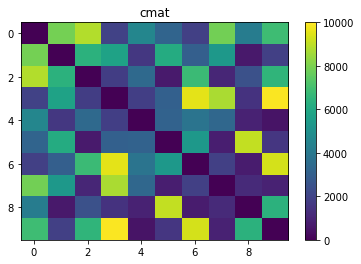

3
constant
10


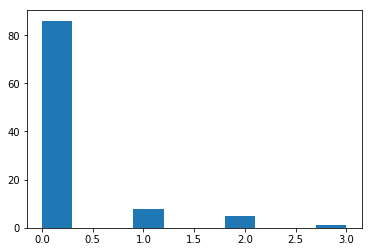

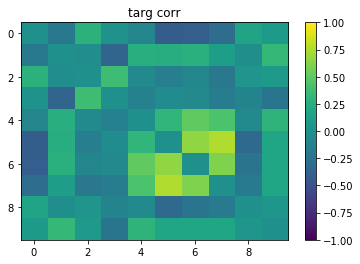

10


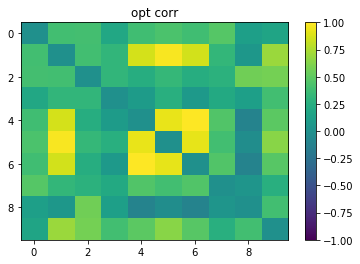

MSE 0.0795370536991  JOB: JOB[i]
10


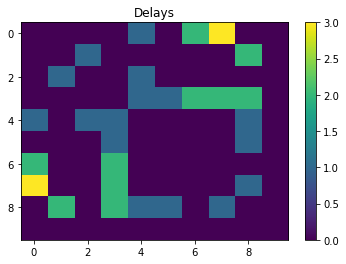

10


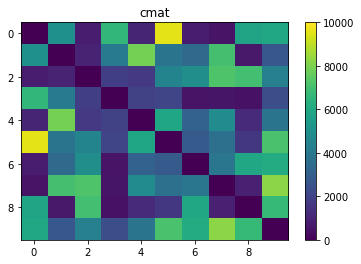

3
constant
10


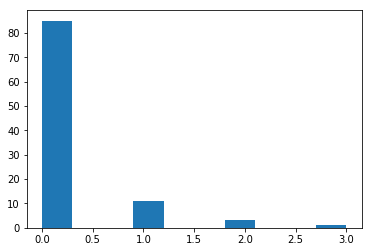

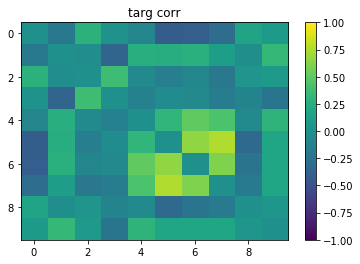

10


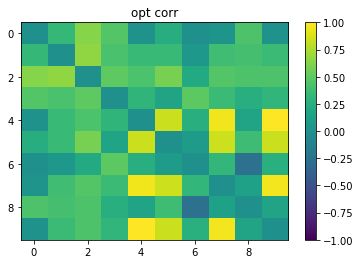

MSE 0.0880610876304  JOB: JOB[i]
10


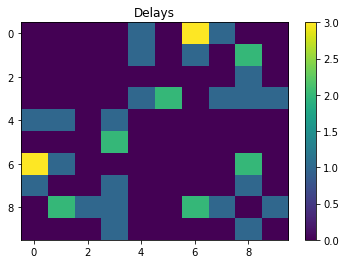

10


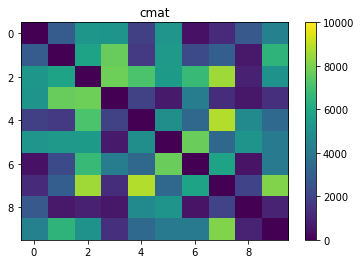

2
constant
10


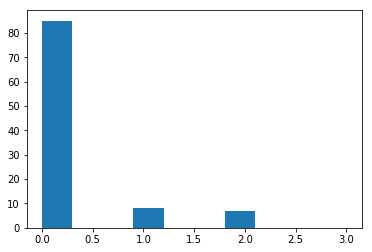

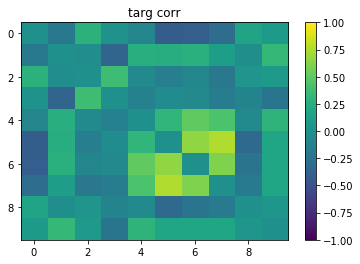

10


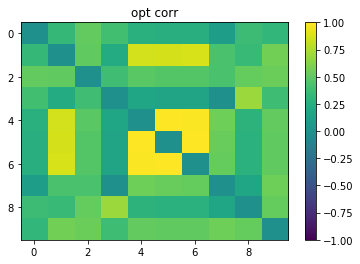

MSE 0.0913309274743  JOB: JOB[i]
10


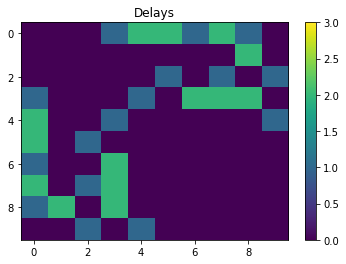

10


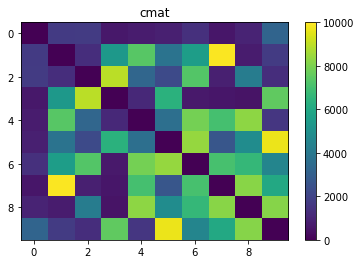

In [10]:
# THE RESULTS ONE BY ONE

for i in range(NUM_JOBS):
    exec(open(load_files[JOB[i]]).read()) #loading variables into the environment
    c = all_res[JOB[i]]
    ind = 0
    cmat = np.ones((nodes, nodes))

    for row in range(0,nodes):
        for col in range(row+1, nodes):
            cmat[row,col] = c[ind]
            cmat[col,row] = c[ind]
            ind += 1
    
    cmat_n = np.reciprocal(cmat, where = cmat>0)
    ue_array, _, delays = hf.wcm.wc_modelsim_c(wc_params, tract_mat, cmat_n, nodes,
                                       seed_num = wc_seed)

    exp_data = hf.plot_cor_mat(ue_array, nodes, skip)


    #quantity we are trying to minimize is the mse 
    res = hf.mse(np.triu(targ_data,1).ravel(),np.triu(exp_data,1).ravel())
    plt.hist(np.triu(delays,1).ravel(), range=(0,3))

    np.fill_diagonal(exp_data, 0)
    hf.plot_mat(targ_data, "targ corr", 1, -1)
    hf.plot_mat(exp_data,"opt corr", 1, -1)
    print("MSE", res, " JOB: JOB[i]")
    hf.plot_mat(delays,"Delays", _max = 3)
    hf.plot_mat(cmat, "cmat", _max =10000, _min =0)

Plot of MEG time series of Target Data

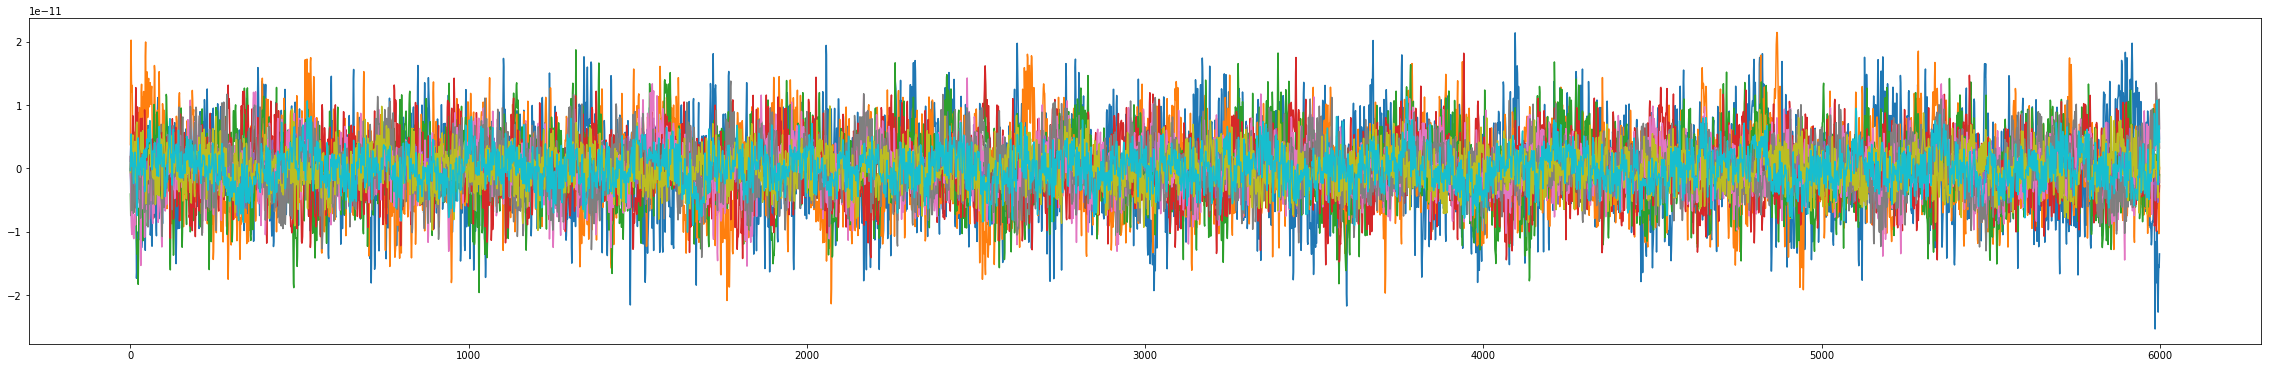

In [11]:
plot_ts(nodes, all_ts)

Conclusion: Doesn't seem like there's multiple solutions of delays - from the matrices, but it does for conduc velocity

Histograms of the delays and the conduction velocities look like from same distribution
